In [69]:
from random import sample
import numpy as np
import pandas as pd
import itertools
pd.set_option('display.expand_frame_repr', False)

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import re

#nltk.download('stopwords')
#nltk.download('punkt')
ps = PorterStemmer()


def itemParser(s):
    
    s = s.replace("\n", "")
    s = re.sub(r'[^\w\s]', '', s)
    s = re.sub(r"(\d)", "", s)
    s = re.sub(r'\([^)]*\)', '', s)
    s = re.sub(u'\w*\u2122', '', s)

    s = s.lower()

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)

    filtered_sentence = [ps.stem(w) for w in word_tokens if not w in stop_words]
    s = ' '.join(filtered_sentence)
    
    return s

In [24]:
superm = []
baskets = []
with open('./data/groceries.csv', 'r') as f:
    for line in f:
        basket = []
        items = line.split(",")
        for item in items:
            parsed = itemParser(item)
            superm.append(parsed)
            basket.append(parsed)
        baskets.append(basket)

In [25]:
products = list(set(superm))

In [26]:
print(products)

['soda', 'spice', 'candi', 'herb', 'can veget', 'process chees', 'curd', 'mustard', 'butter milk', 'sound storag medium', 'vinegar', 'cleaner', 'pip fruit', 'hygien articl', 'flower seed', 'dog food', 'long life bakeri product', 'dish', 'instant food product', 'condens milk', 'beef', 'tropic fruit', 'brandi', 'fish', 'potato product', 'domest egg', 'pet care', 'organ sausag', 'popcorn', 'butter', 'napkin', 'photofilm', 'syrup', 'dessert', 'tea', 'specialti veget', 'ice cream', 'whippedsour cream', 'chocol marshmallow', 'can fish', 'specialti chocol', 'citru fruit', 'oil', 'light bulb', 'abras cleaner', 'specialti fat', 'coffe', 'specialti chees', 'soup', 'pork', 'liquor', 'skin care', 'misc beverag', 'redblush wine', 'cling filmbag', 'finish product', 'ham', 'frozen meal', 'curd chees', 'frozen fish', 'decalcifi', 'dental care', 'organ product', 'liver loaf', 'berri', 'cream', 'chicken', 'pasta', 'frozen veget', 'bathroom cleaner', 'sausag', 'hair spray', 'beverag', 'uhtmilk', 'pickl v

In [27]:
elems = set()
for b in baskets:
    elems.update(b)

mapping = {}
reverseMapping = {}
key = 0
for e in elems:
    mapping[e] = key
    reverseMapping[key] = e
    key += 1
    
print("Mapping")
print(mapping)

Mapping
{'soda': 0, 'spice': 1, 'candi': 2, 'herb': 3, 'can veget': 4, 'process chees': 5, 'curd': 6, 'mustard': 7, 'butter milk': 8, 'sound storag medium': 9, 'vinegar': 10, 'cleaner': 11, 'pip fruit': 12, 'hygien articl': 13, 'flower seed': 14, 'dog food': 15, 'long life bakeri product': 16, 'dish': 17, 'instant food product': 18, 'condens milk': 19, 'beef': 20, 'tropic fruit': 21, 'brandi': 22, 'fish': 23, 'potato product': 24, 'domest egg': 25, 'pet care': 26, 'organ sausag': 27, 'popcorn': 28, 'butter': 29, 'napkin': 30, 'photofilm': 31, 'syrup': 32, 'dessert': 33, 'tea': 34, 'specialti veget': 35, 'ice cream': 36, 'whippedsour cream': 37, 'chocol marshmallow': 38, 'can fish': 39, 'specialti chocol': 40, 'citru fruit': 41, 'oil': 42, 'light bulb': 43, 'abras cleaner': 44, 'specialti fat': 45, 'coffe': 46, 'specialti chees': 47, 'soup': 48, 'pork': 49, 'liquor': 50, 'skin care': 51, 'misc beverag': 52, 'redblush wine': 53, 'cling filmbag': 54, 'finish product': 55, 'ham': 56, 'froz

In [28]:
print(reverseMapping)

{0: 'soda', 1: 'spice', 2: 'candi', 3: 'herb', 4: 'can veget', 5: 'process chees', 6: 'curd', 7: 'mustard', 8: 'butter milk', 9: 'sound storag medium', 10: 'vinegar', 11: 'cleaner', 12: 'pip fruit', 13: 'hygien articl', 14: 'flower seed', 15: 'dog food', 16: 'long life bakeri product', 17: 'dish', 18: 'instant food product', 19: 'condens milk', 20: 'beef', 21: 'tropic fruit', 22: 'brandi', 23: 'fish', 24: 'potato product', 25: 'domest egg', 26: 'pet care', 27: 'organ sausag', 28: 'popcorn', 29: 'butter', 30: 'napkin', 31: 'photofilm', 32: 'syrup', 33: 'dessert', 34: 'tea', 35: 'specialti veget', 36: 'ice cream', 37: 'whippedsour cream', 38: 'chocol marshmallow', 39: 'can fish', 40: 'specialti chocol', 41: 'citru fruit', 42: 'oil', 43: 'light bulb', 44: 'abras cleaner', 45: 'specialti fat', 46: 'coffe', 47: 'specialti chees', 48: 'soup', 49: 'pork', 50: 'liquor', 51: 'skin care', 52: 'misc beverag', 53: 'redblush wine', 54: 'cling filmbag', 55: 'finish product', 56: 'ham', 57: 'frozen m

In [49]:
newBaskets = []

for basket in baskets:
    ohe = [0 for _ in range(len(mapping))]
    for item in basket:
        ohe[mapping[item]] = 1
    newBaskets.append(ohe)

In [50]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

In [51]:
pdds = pd.DataFrame(newBaskets)

In [52]:
frq_items = apriori(pdds, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False]) 
print(rules) 

  antecedents consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
2       (144)       (166)            0.139502            0.255516  0.056024    0.401603  1.571735  0.020379    1.244132
4       (147)       (166)            0.193493            0.255516  0.074835    0.386758  1.513634  0.025394    1.214013
0       (139)       (166)            0.183935            0.255516  0.056634    0.307905  1.205032  0.009636    1.075696
5       (166)       (147)            0.255516            0.193493  0.074835    0.292877  1.513634  0.025394    1.140548
1       (166)       (139)            0.255516            0.183935  0.056634    0.221647  1.205032  0.009636    1.048452
3       (166)       (144)            0.255516            0.139502  0.056024    0.219260  1.571735  0.020379    1.102157


In [53]:
c_1 = {}
for b in baskets:
    for item in b:
        if item not in c_1.keys():
            c_1[item] = 0
        c_1[item] += 1
        
print("Count singletons")
print(c_1)

Count singletons
{'citru fruit': 814, 'semifinish bread': 174, 'margarin': 576, 'readi soup': 18, 'tropic fruit': 1032, 'yogurt': 1372, 'coffe': 571, 'whole milk': 2513, 'pip fruit': 744, 'cream chees': 390, 'meat spread': 42, 'veget': 1903, 'condens milk': 101, 'long life bakeri product': 368, 'butter': 545, 'rice': 75, 'abras cleaner': 35, 'rollsbun': 1809, 'uhtmilk': 329, 'bottl beer': 792, 'liquor appet': 78, 'pot plant': 170, 'cereal': 56, 'white bread': 414, 'bottl water': 1087, 'chocol': 488, 'curd': 524, 'flour': 171, 'dish': 173, 'beef': 516, 'frankfurt': 580, 'soda': 1715, 'chicken': 422, 'sugar': 333, 'fruitveget juic': 711, 'newspap': 785, 'packag fruitveget': 128, 'specialti bar': 269, 'butter milk': 275, 'pastri': 875, 'process chees': 163, 'deterg': 189, 'root veget': 1072, 'frozen dessert': 106, 'sweet spread': 89, 'salti snack': 372, 'waffl': 378, 'candi': 294, 'bathroom cleaner': 27, 'can beer': 764, 'sausag': 924, 'brown bread': 638, 'shop bag': 969, 'beverag': 256, 

In [107]:
selected = []
for c in c_1:
    if(c_1[c] > 250):
        selected.append(c)
        
print("Filter")
print(len(selected))

Filter
53


In [108]:
pairs = list(itertools.combinations(selected, 2))

In [116]:
A = np.zeros((len(selected), len(selected)))
names = [_ for _ in selected]
matrix = pd.DataFrame(A, index=names, columns=names)
display(matrix)

,citru fruit,margarin,tropic fruit,yogurt,coffe,whole milk,pip fruit,cream chees,veget,long life bakeri product,...,dessert,domest egg,misc beverag,ham,oil,frozen veget,specialti chocol,frozen meal,onion,meat
citru fruit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
margarin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tropic fruit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yogurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
coffe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
whole milk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pip fruit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cream chees,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
veget,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
long life bakeri product,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
for b in baskets:
    #print(b)
    for p in pairs:
        #print("\t" + p[0] + " - " + p[1])
        if p[0] in b and p[1] in b:
            #print("\t\tOK")
            matrix.loc[p[0], p[1]] += 1
            
display(matrix)

,citru fruit,margarin,tropic fruit,yogurt,coffe,whole milk,pip fruit,cream chees,veget,long life bakeri product,...,dessert,domest egg,misc beverag,ham,oil,frozen veget,specialti chocol,frozen meal,onion,meat
citru fruit,0.0,78.0,196.0,213.0,63.0,300.0,136.0,56.0,284.0,41.0,...,42.0,102.0,22.0,28.0,49.0,65.0,23.0,33.0,55.0,34.0
margarin,0.0,0.0,92.0,140.0,46.0,238.0,84.0,46.0,194.0,32.0,...,30.0,82.0,16.0,26.0,36.0,50.0,13.0,12.0,24.0,20.0
tropic fruit,0.0,0.0,0.0,288.0,70.0,416.0,201.0,71.0,353.0,62.0,...,62.0,112.0,45.0,53.0,46.0,86.0,33.0,54.0,56.0,33.0
yogurt,0.0,0.0,0.0,0.0,96.0,551.0,177.0,122.0,427.0,86.0,...,97.0,141.0,44.0,66.0,52.0,122.0,47.0,61.0,71.0,52.0
coffe,0.0,0.0,0.0,0.0,0.0,184.0,68.0,37.0,132.0,34.0,...,23.0,49.0,13.0,17.0,33.0,44.0,18.0,23.0,25.0,22.0
whole milk,0.0,0.0,0.0,0.0,0.0,0.0,296.0,162.0,736.0,133.0,...,135.0,295.0,69.0,113.0,111.0,201.0,79.0,97.0,119.0,98.0
pip fruit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,257.0,45.0,...,49.0,85.0,21.0,39.0,29.0,72.0,21.0,45.0,34.0,27.0
cream chees,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,28.0,...,35.0,50.0,18.0,22.0,18.0,29.0,14.0,14.0,21.0,16.0
veget,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,...,114.0,219.0,55.0,90.0,98.0,175.0,60.0,74.0,140.0,98.0
long life bakeri product,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,38.0,15.0,20.0,13.0,38.0,24.0,26.0,14.0,18.0


In [146]:
print("Max value: ")
print(max(matrix.max()))

Max value: 
736.0


In [150]:
frequent_pairs = []

for pair in pairs:
    val = matrix.loc[pair[0], pair[1]]
    if val > 200:
        frequent_pairs.append(pair)
        
print("Frequent pairs:")
print(frequent_pairs)
print(len(frequent_pairs))

Frequent pairs:
[('citru fruit', 'yogurt'), ('citru fruit', 'whole milk'), ('citru fruit', 'veget'), ('margarin', 'whole milk'), ('tropic fruit', 'yogurt'), ('tropic fruit', 'whole milk'), ('tropic fruit', 'pip fruit'), ('tropic fruit', 'veget'), ('tropic fruit', 'rollsbun'), ('tropic fruit', 'soda'), ('tropic fruit', 'root veget'), ('yogurt', 'whole milk'), ('yogurt', 'veget'), ('yogurt', 'rollsbun'), ('yogurt', 'bottl water'), ('yogurt', 'soda'), ('yogurt', 'root veget'), ('yogurt', 'whippedsour cream'), ('whole milk', 'pip fruit'), ('whole milk', 'veget'), ('whole milk', 'butter'), ('whole milk', 'rollsbun'), ('whole milk', 'bottl beer'), ('whole milk', 'bottl water'), ('whole milk', 'curd'), ('whole milk', 'beef'), ('whole milk', 'frankfurt'), ('whole milk', 'soda'), ('whole milk', 'fruitveget juic'), ('whole milk', 'newspap'), ('whole milk', 'pastri'), ('whole milk', 'root veget'), ('whole milk', 'sausag'), ('whole milk', 'brown bread'), ('whole milk', 'shop bag'), ('whole milk', 

In [167]:
voc = []
for pair in frequent_pairs:
    pair = list(pair)    
    for item in pair:
        voc.append(item)
        
voc = list(set(voc))
print(voc)

['citru fruit', 'sausag', 'soda', 'pip fruit', 'newspap', 'butter', 'shop bag', 'veget', 'margarin', 'fruitveget juic', 'beef', 'brown bread', 'frankfurt', 'frozen veget', 'domest egg', 'bottl water', 'rollsbun', 'root veget', 'whippedsour cream', 'curd', 'pork', 'tropic fruit', 'yogurt', 'pastri', 'whole milk', 'bottl beer']


In [194]:
candidates_triples = {}
for pair in frequent_pairs:
    pair = list(pair)
    for v in voc:
        if v not in pair:
            tmp = [x for x in pair]
            tmp.append(v)
            candidates_triples[str(tmp)] = 0
            

In [195]:
print("Candidates Triples")
#print(candidates_triples)
print(len(candidates_triples))

Candidates Triples
1440


In [206]:
for basket in baskets:
    if len(basket) >= 3:
        for candidate in candidates_triples:
            items = eval(candidate)
            if items[0] in basket:
                if item[1] in basket:
                    if item[2] in basket:
                        candidates_triples[candidate] += 1
    
print(candidates_triples)

{"['citru fruit', 'yogurt', 'sausag']": 0, "['citru fruit', 'yogurt', 'soda']": 0, "['citru fruit', 'yogurt', 'pip fruit']": 0, "['citru fruit', 'yogurt', 'newspap']": 0, "['citru fruit', 'yogurt', 'butter']": 0, "['citru fruit', 'yogurt', 'shop bag']": 0, "['citru fruit', 'yogurt', 'veget']": 0, "['citru fruit', 'yogurt', 'margarin']": 0, "['citru fruit', 'yogurt', 'fruitveget juic']": 0, "['citru fruit', 'yogurt', 'beef']": 0, "['citru fruit', 'yogurt', 'brown bread']": 0, "['citru fruit', 'yogurt', 'frankfurt']": 0, "['citru fruit', 'yogurt', 'frozen veget']": 0, "['citru fruit', 'yogurt', 'domest egg']": 0, "['citru fruit', 'yogurt', 'bottl water']": 0, "['citru fruit', 'yogurt', 'rollsbun']": 0, "['citru fruit', 'yogurt', 'root veget']": 0, "['citru fruit', 'yogurt', 'whippedsour cream']": 0, "['citru fruit', 'yogurt', 'curd']": 0, "['citru fruit', 'yogurt', 'pork']": 0, "['citru fruit', 'yogurt', 'tropic fruit']": 0, "['citru fruit', 'yogurt', 'pastri']": 0, "['citru fruit', 'yog

In [210]:
for item in candidates_triples:
    print(item + " -> " + str(candidates_triples[item]))

['citru fruit', 'yogurt', 'sausag'] -> 0
['citru fruit', 'yogurt', 'soda'] -> 0
['citru fruit', 'yogurt', 'pip fruit'] -> 0
['citru fruit', 'yogurt', 'newspap'] -> 0
['citru fruit', 'yogurt', 'butter'] -> 0
['citru fruit', 'yogurt', 'shop bag'] -> 0
['citru fruit', 'yogurt', 'veget'] -> 0
['citru fruit', 'yogurt', 'margarin'] -> 0
['citru fruit', 'yogurt', 'fruitveget juic'] -> 0
['citru fruit', 'yogurt', 'beef'] -> 0
['citru fruit', 'yogurt', 'brown bread'] -> 0
['citru fruit', 'yogurt', 'frankfurt'] -> 0
['citru fruit', 'yogurt', 'frozen veget'] -> 0
['citru fruit', 'yogurt', 'domest egg'] -> 0
['citru fruit', 'yogurt', 'bottl water'] -> 0
['citru fruit', 'yogurt', 'rollsbun'] -> 0
['citru fruit', 'yogurt', 'root veget'] -> 0
['citru fruit', 'yogurt', 'whippedsour cream'] -> 0
['citru fruit', 'yogurt', 'curd'] -> 0
['citru fruit', 'yogurt', 'pork'] -> 0
['citru fruit', 'yogurt', 'tropic fruit'] -> 0
['citru fruit', 'yogurt', 'pastri'] -> 0
['citru fruit', 'yogurt', 'whole milk'] -> 0

In [6]:
print(products)

['soda', 'spice', 'candi', 'herb', 'can veget', 'process chees', 'curd', 'mustard', 'butter milk', 'sound storag medium', 'vinegar', 'cleaner', 'pip fruit', 'hygien articl', 'flower seed', 'dog food', 'long life bakeri product', 'dish', 'instant food product', 'condens milk', 'beef', 'tropic fruit', 'brandi', 'fish', 'potato product', 'domest egg', 'pet care', 'organ sausag', 'popcorn', 'butter', 'napkin', 'photofilm', 'syrup', 'dessert', 'tea', 'specialti veget', 'ice cream', 'whippedsour cream', 'chocol marshmallow', 'can fish', 'specialti chocol', 'citru fruit', 'oil', 'light bulb', 'abras cleaner', 'specialti fat', 'coffe', 'specialti chees', 'soup', 'pork', 'liquor', 'skin care', 'misc beverag', 'redblush wine', 'cling filmbag', 'finish product', 'ham', 'frozen meal', 'curd chees', 'frozen fish', 'decalcifi', 'dental care', 'organ product', 'liver loaf', 'berri', 'cream', 'chicken', 'pasta', 'frozen veget', 'bathroom cleaner', 'sausag', 'hair spray', 'beverag', 'uhtmilk', 'pickl v

In [33]:
boolmatrix = []
for b in baskets:
    row = [0 for _ in products]
    for item in b:
        row[mapping[item]] += 1
    boolmatrix.append(row)

In [38]:
el = ""
for i in mapping:
    el += i + ","
el = el[:-1]
print(el)

soda,spice,candi,herb,can veget,process chees,curd,mustard,butter milk,sound storag medium,vinegar,cleaner,pip fruit,hygien articl,flower seed,dog food,long life bakeri product,dish,instant food product,condens milk,beef,tropic fruit,brandi,fish,potato product,domest egg,pet care,organ sausag,popcorn,butter,napkin,photofilm,syrup,dessert,tea,specialti veget,ice cream,whippedsour cream,chocol marshmallow,can fish,specialti chocol,citru fruit,oil,light bulb,abras cleaner,specialti fat,coffe,specialti chees,soup,pork,liquor,skin care,misc beverag,redblush wine,cling filmbag,finish product,ham,frozen meal,curd chees,frozen fish,decalcifi,dental care,organ product,liver loaf,berri,cream,chicken,pasta,frozen veget,bathroom cleaner,sausag,hair spray,beverag,uhtmilk,pickl veget,sugar,root veget,brown bread,hard chees,white wine,bottl beer,sparkl wine,pot plant,margarin,nutsprun,whiski,cream chees,packag fruitveget,semifinish bread,meat spread,babi food,salad dress,cereal,frozen chicken,flour,r

In [40]:
f = open("./data/groceries_boolean.csv", "w")

In [41]:
f.write(el + "\n")

1775

In [45]:
for x in boolmatrix:
    out = ""
    for y in x:
        out += str(y) + ","
    out = out[:-1] + "\n"
    f.write(out)

In [46]:
f.close()

In [48]:
len(boolmatrix[0])

169

In [72]:
maxlen = 0
for b in baskets:
    if len(b) > maxlen:
        maxlen = len(b)
        
count = [0 for _ in range(maxlen + 1)]
for b in baskets:
    count[len(b)] += 1

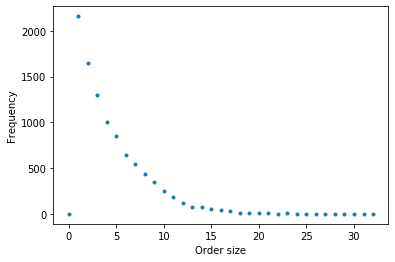

In [77]:
plt.ylabel("Frequency")
plt.xlabel("Order size")
plt.plot(count, ".")

In [99]:
boolM = pd.DataFrame(boolmatrix)

In [109]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [115]:
pca = PCA(n_components=5)
pcat = pca.fit_transform(boolM)
principalDf = pd.DataFrame(data=pcat)

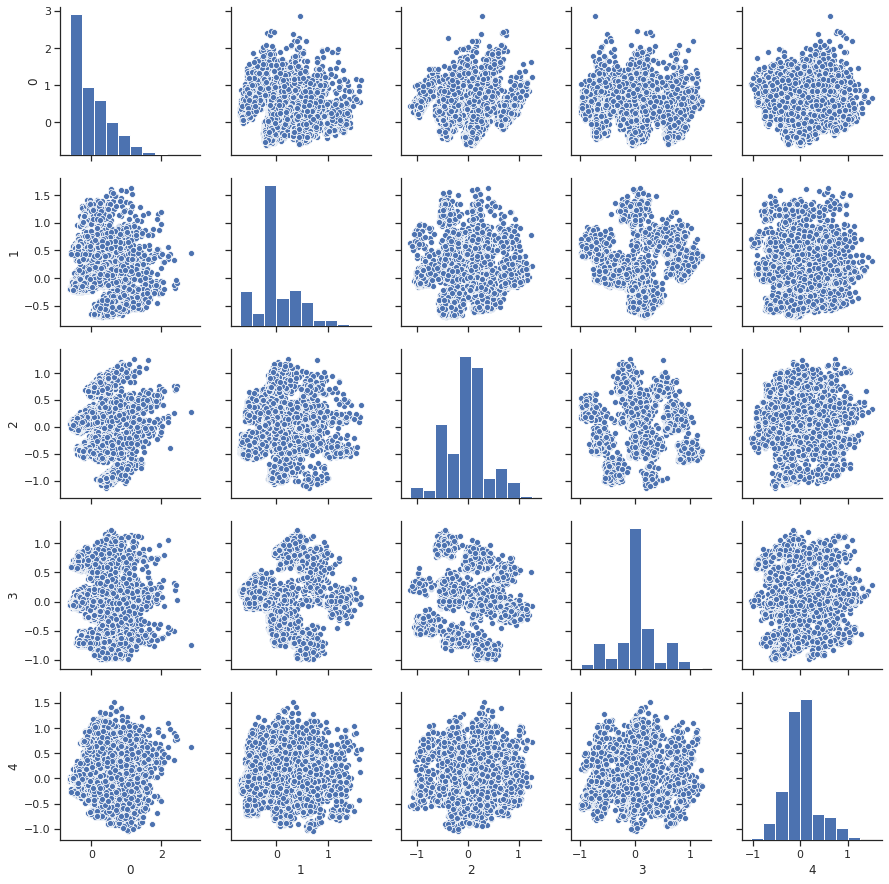

In [116]:
g = sns.pairplot(principalDf)

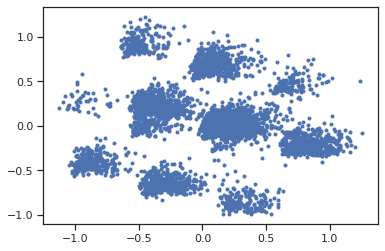

In [117]:
xx = list(principalDf[2])
yy = list(principalDf[3])

plt.scatter(xx, yy, marker=".")

In [123]:
interessanti = principalDf.loc[:,2:3]

In [218]:
from sklearn.cluster import KMeans, DBSCAN

In [216]:
'''kmeans = KMeans(n_clusters=10).fit(interessanti)
centroids = kmeans.cluster_centers_
print(centroids)'''

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDf)
    distortions.append(kmeanModel.inertia_)

In [258]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(principalDf)

In [259]:
#np.unique(dbscan)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('n clust:', n_clusters_)
print('n noise:', n_noise_)


n clust: 6
n noise: 6


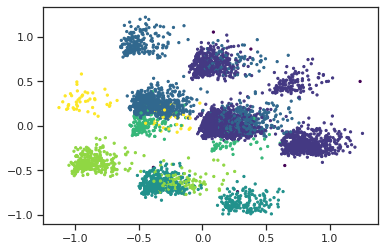

In [267]:
xx = list(principalDf[2])
yy = list(principalDf[3])


plt.scatter(xx, yy, c=labels, s=5, cmap='viridis')



#interessanti['Cluster'] = pd.Series(labels)
# = sns.pairplot(interessanti)

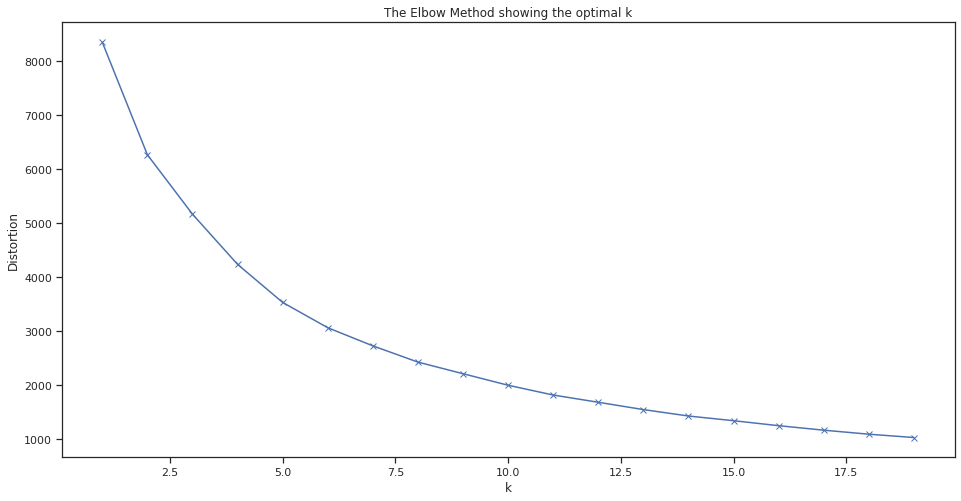

In [217]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [282]:
kmeanModel = KMeans(n_clusters=10)
kmeanModel.fit(principalDf.loc[:,2:3])
predicted = list(kmeanModel.predict(principalDf.loc[:,2:3]))

In [283]:
interessanti['Cluster'] = pd.Series(predicted)

/home/elia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


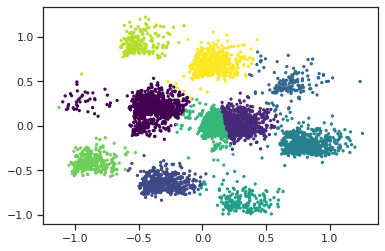

In [284]:
interessanti

plt.scatter(xx, yy, c=predicted, s=5, cmap='viridis')


In [147]:
clusteredBasket = list(zip(baskets, predicted))

In [ ]:
for b in clusteredBasket:
    if b[1] == 8:
        print(b[0])

In [207]:
def countItems(lista, top):
    counting = {}
    for items in lista:
        for item in items:
            if item not in counting.keys():
                counting[item] = 0
            counting[item] += 1
            
    counting = [(k, v) for k, v in sorted(counting.items(), key=lambda item: item[1], reverse=True)]
    tops = counting[:top]
    
    for (k, v) in tops:
        print("      " + str(k) + " [" + str(v) + "]")
    

In [167]:
pdClusteredBasket = pd.DataFrame(clusteredBasket, columns=["Basket", "Cluster"])

In [172]:
pdClusteredBasket.where("Cluster")

SyntaxError: keyword can't be an expression (<ipython-input-172-66e1506985f1>, line 1)

In [174]:
clusters = []
for i in range(10):
    clusters.append(pdClusteredBasket.loc[pdClusteredBasket['Cluster'] == i])

In [177]:
clusters[2]

,Basket,Cluster
6,[rollsbun],2
47,[rollsbun],2
50,"[sausag, rollsbun, cat food, newspap]",2
57,"[rollsbun, oil, bottl water, chew gum, chocol ...",2
58,"[ham, beef, whippedsour cream, ice cream, roll...",2
...,...,...
9791,"[chicken, berri, root veget, veget, whole milk...",2
9793,"[frankfurt, sausag, butter milk, rollsbun, mar...",2
9796,"[ham, hamburg meat, pip fruit, butter, butter ...",2
9812,"[tropic fruit, pip fruit, rollsbun, pastri, bo...",2


In [209]:
for i in range(10):
    print("Cluster " + str(i+1) + ":")
    countItems(list(clusters[i]["Basket"]), 10)

Cluster 1:
      can beer [459]
      bottl beer [327]
      bottl water [313]
      yogurt [270]
      pastri [265]
      newspap [251]
      shop bag [240]
      sausag [235]
      coffe [196]
      veget [162]
Cluster 2:
      soda [983]
      bottl water [159]
      shop bag [120]
      yogurt [113]
      bottl beer [105]
      fruitveget juic [101]
      whole milk [93]
      pastri [91]
      sausag [90]
      tropic fruit [86]
Cluster 3:
      rollsbun [894]
      yogurt [125]
      whole milk [122]
      sausag [116]
      veget [116]
      frankfurt [99]
      tropic fruit [93]
      newspap [87]
      bottl water [83]
      root veget [78]
Cluster 4:
      whole milk [1232]
      rollsbun [306]
      soda [306]
      yogurt [242]
      bottl water [175]
      sausag [173]
      tropic fruit [167]
      root veget [166]
      pastri [160]
      newspap [146]
Cluster 5:
      veget [808]
      root veget [170]
      yogurt [143]
      tropic fruit [130]
      citru fruit [125]
